[데이터 분석과 시각화 -> 알츠하이머 진단 유무 사람들의 조건별 차이]
- 데이터셋 : alzheimers_disease_data.csv
- 타겟/라벨 : Diagnosis
- 피쳐/속성 : MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADLmpg 컬럼으로 Diagnosis와의 관계 분석

In [22]:
# !pip install seaborn

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # 버블 그래프
import matplotlib.font_manager as fm
from matplotlib import font_manager
font_path = r'C:\Users\KDP-529\AppData\Local\Microsoft\Windows\Fonts\Pretendard-Regular.ttf'  # 폰트 파일 경로를 지정하세요.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Pretendard'

In [24]:
# utils.setHangulFont(F_PATH)

In [25]:
# 데이터 불러오기 및 내용 확인
alzheimers = pd.read_csv("../DATA/alzheimers_disease_data.csv")
alzheimers

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [26]:
# 데이터의 정보 확인
alzheimers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [27]:
# 데이터의 통계값 확인 
alzheimers.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# 타겟 데이터와 비교할 컬럼 데이터 프레임 생성
alz_part3=alzheimers.loc[:,"MMSE":"ADL"]
alz_part3

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL
0,21.463532,6.518877,0,0,1.725883
1,20.613267,7.118696,0,0,2.592424
2,7.356249,5.895077,0,0,7.119548
3,13.991127,8.965106,0,1,6.481226
4,13.517609,6.045039,0,0,0.014691
...,...,...,...,...,...
2144,1.201190,0.238667,0,0,4.492838
2145,6.458060,8.687480,0,1,9.204952
2146,17.011003,1.972137,0,0,5.036334
2147,4.030491,5.173891,0,0,3.785399


In [29]:
# Diagnosis 컬럼 추가
alz_part3["Diagnosis"] = alzheimers["Diagnosis"]
alz_part3

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,21.463532,6.518877,0,0,1.725883,0
1,20.613267,7.118696,0,0,2.592424,0
2,7.356249,5.895077,0,0,7.119548,0
3,13.991127,8.965106,0,1,6.481226,0
4,13.517609,6.045039,0,0,0.014691,0
...,...,...,...,...,...,...
2144,1.201190,0.238667,0,0,4.492838,1
2145,6.458060,8.687480,0,1,9.204952,1
2146,17.011003,1.972137,0,0,5.036334,1
2147,4.030491,5.173891,0,0,3.785399,1


In [30]:
# 데이터의 통계값 확인
alz_part3.describe()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,14.755132,5.080055,0.208004,0.156817,4.982958,0.353653
std,8.613151,2.892743,0.405974,0.363713,2.949775,0.478214
min,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000
25%,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000
50%,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000
75%,22.161028,7.546981,0.000000,0.000000,7.581490,1.000000
max,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000


In [31]:
# 컬럼에 대한 설명
"""
MMSE(Mini-Mental State Examination) - 간이 정신 상태 검사 점수, 0~30점. 점수가 낮을수록 인지 장애가 있음을 나타냅니다.
Functional Assessment - 기능평가 점수, 0~10점. 점수가 낮을수록 기능 장애가 심함을 나타냅니다.
Memory Complaints - 기억 장애, 0은 없음을 나타내고 1은 있음을 나타냅니다.
Behavioral Problems - 행동 문제, 0은 없음을 나타내고 1은 있음을 나타냅니다.
ADL(Activities of Daily Living) - 일상 생활 활동 점수, 0~10점. 점수가 낮을수록 장애가 심함을 나타냅니다.
Diagnosis - 알츠하이머 진단， ０은 아니고 １은 받음을 나타냅니다.
"""

'\nMMSE(Mini-Mental State Examination) - 간이 정신 상태 검사 점수, 0~30점. 점수가 낮을수록 인지 장애가 있음을 나타냅니다.\nFunctional Assessment - 기능평가 점수, 0~10점. 점수가 낮을수록 기능 장애가 심함을 나타냅니다.\nMemory Complaints - 기억 장애, 0은 없음을 나타내고 1은 있음을 나타냅니다.\nBehavioral Problems - 행동 문제, 0은 없음을 나타내고 1은 있음을 나타냅니다.\nADL(Activities of Daily Living) - 일상 생활 활동 점수, 0~10점. 점수가 낮을수록 장애가 심함을 나타냅니다.\nDiagnosis - 알츠하이머 진단， ０은 아니고 １은 받음을 나타냅니다.\n'

In [32]:
aData=alz_part3["MMSE"]
bData=alz_part3["FunctionalAssessment"]
gData=alz_part3["MemoryComplaints"]
dData=alz_part3["BehavioralProblems"]
eData=alz_part3["ADL"]

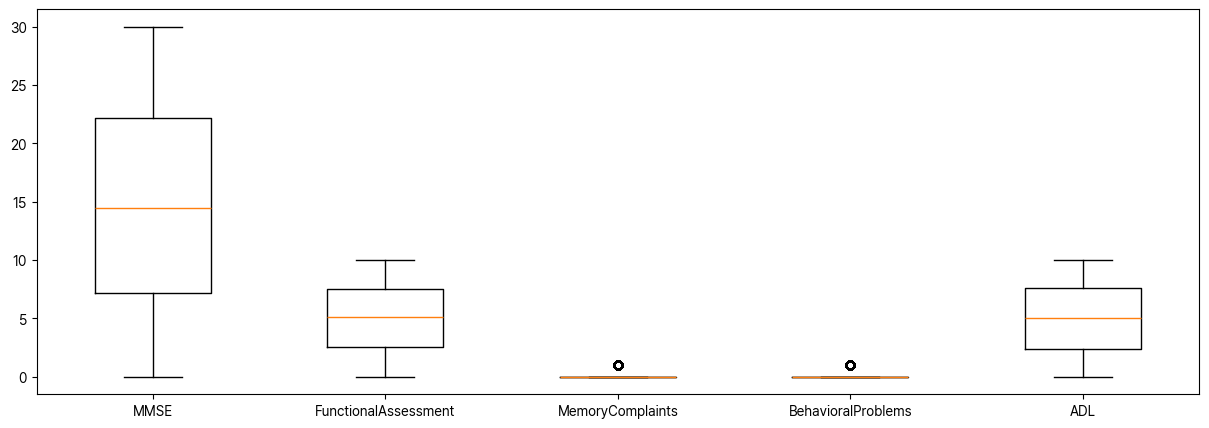

In [33]:
# 이상치 그래프로 확인
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot([aData,bData,gData,dData,eData])
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL'])
plt.show()
# MemoryComplaints와 BehavioralProblems는 이상치가 있는것 처럼 보이지만 0과 1로만 이루어진 데이터라 0아닌 1 데이터는 이상치로 보이는 오류를 범할 수 있음.

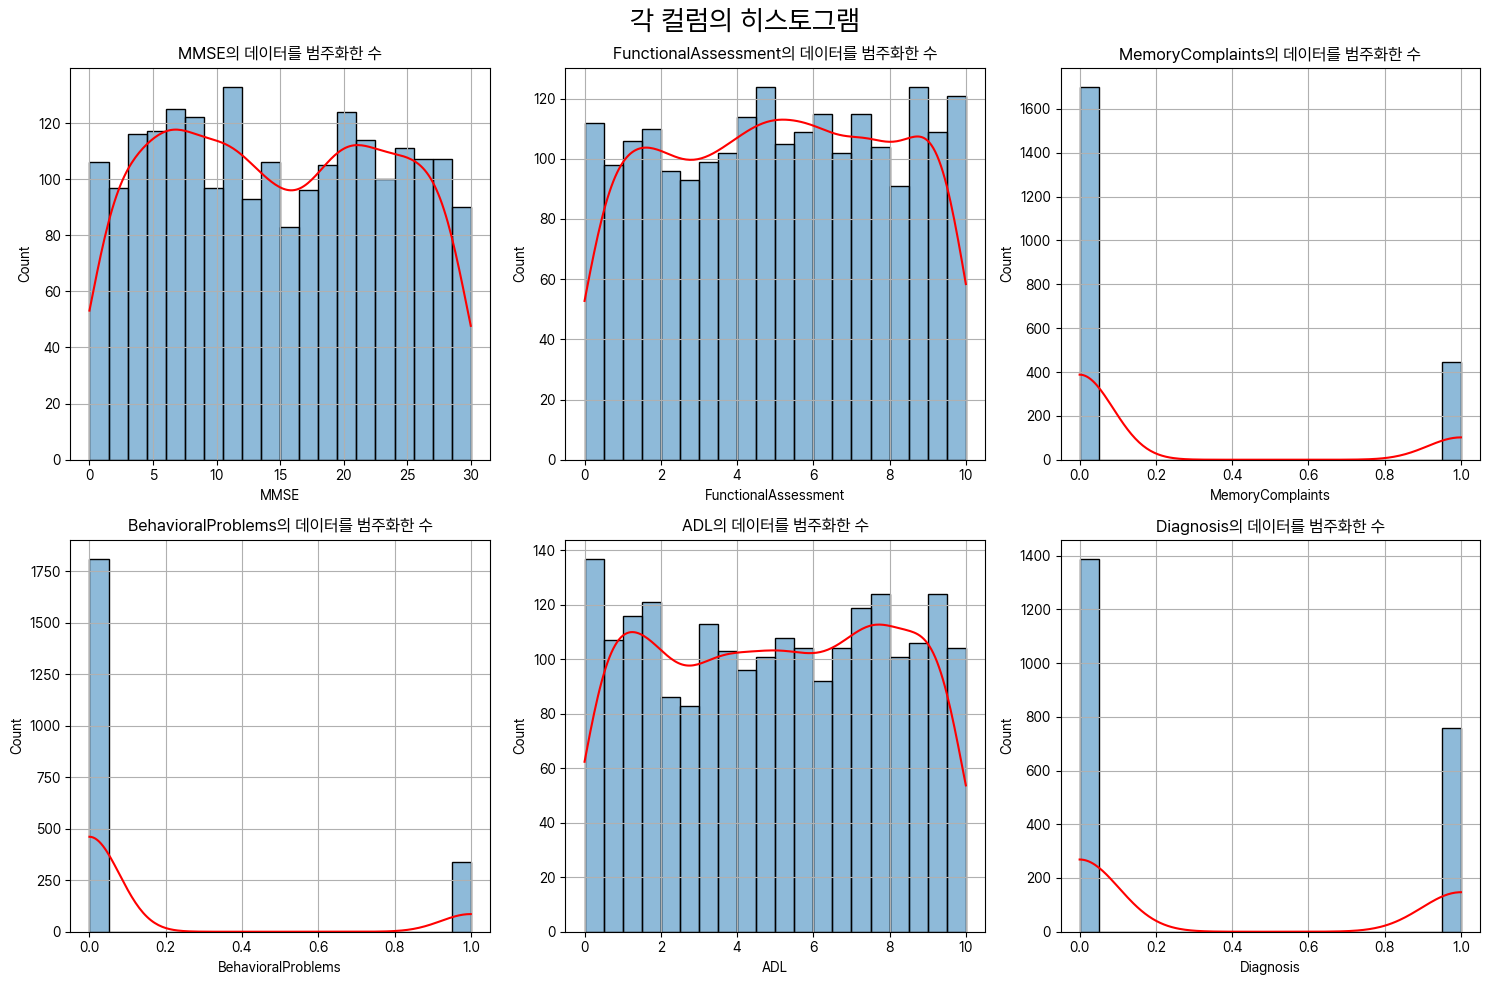

In [34]:
# 각 컬럼의 데이터를 범주화해 카운트
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))
fig.suptitle('각 컬럼의 히스토그램', size=20)

# 각 서브플롯에 히스토그램 추가
for i, column in enumerate(alz_part3.columns):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.histplot(data=alz_part3, x=column, kde=True, bins=20, ax=ax)
    ax.lines[0].set_color('red')  # KDE의 색상을 빨간색으로 설정
    ax.set_title(f'{column}의 데이터를 범주화한 수')
    ax.grid()

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [35]:
alz_part3.corr()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
MMSE,1.000000,0.024932,0.007652,0.025408,0.003359,-0.237126
FunctionalAssessment,0.024932,1.000000,0.002320,-0.021941,0.053904,-0.364898
MemoryComplaints,0.007652,0.002320,1.000000,-0.009765,-0.037511,0.306742
BehavioralProblems,0.025408,-0.021941,-0.009765,1.000000,0.043376,0.224350
ADL,0.003359,0.053904,-0.037511,0.043376,1.000000,-0.332346
Diagnosis,-0.237126,-0.364898,0.306742,0.224350,-0.332346,1.000000


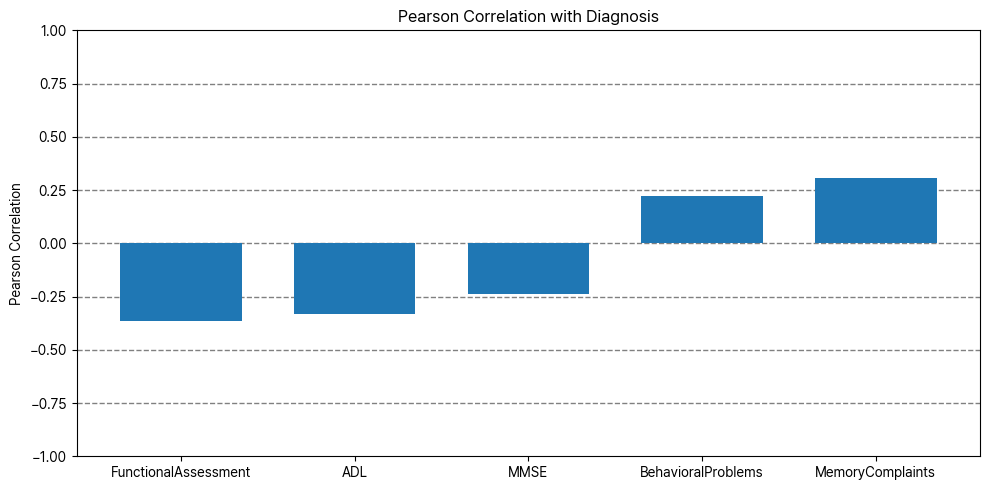

In [ ]:
# 피어슨 상관계수 계산
correlations = alz_part3.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# 그래프 크기 설정정
plt.figure(figsize=(10, 5))

# 피어슨 상관계수의 막대 그래프 생성
ax = correlations.plot(kind='bar', width=0.7)

# y축 범위 및 레이블 설정
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', title='Pearson Correlation with Diagnosis')

# x축 레이블을 더 잘 보이도록 90도 회전
ax.set_xticklabels(correlations.index, rotation=0)

# y축 0.0을 기준으로 0.25씩 가로 점선 추가
y_values = np.arange(-0.75, 0.76, 0.25)  # -1부터 1까지 0.25 간격으로
for y in y_values:
    ax.axhline(y, color='gray', linestyle='--', linewidth=1, zorder=0)

plt.tight_layout()
plt.show()

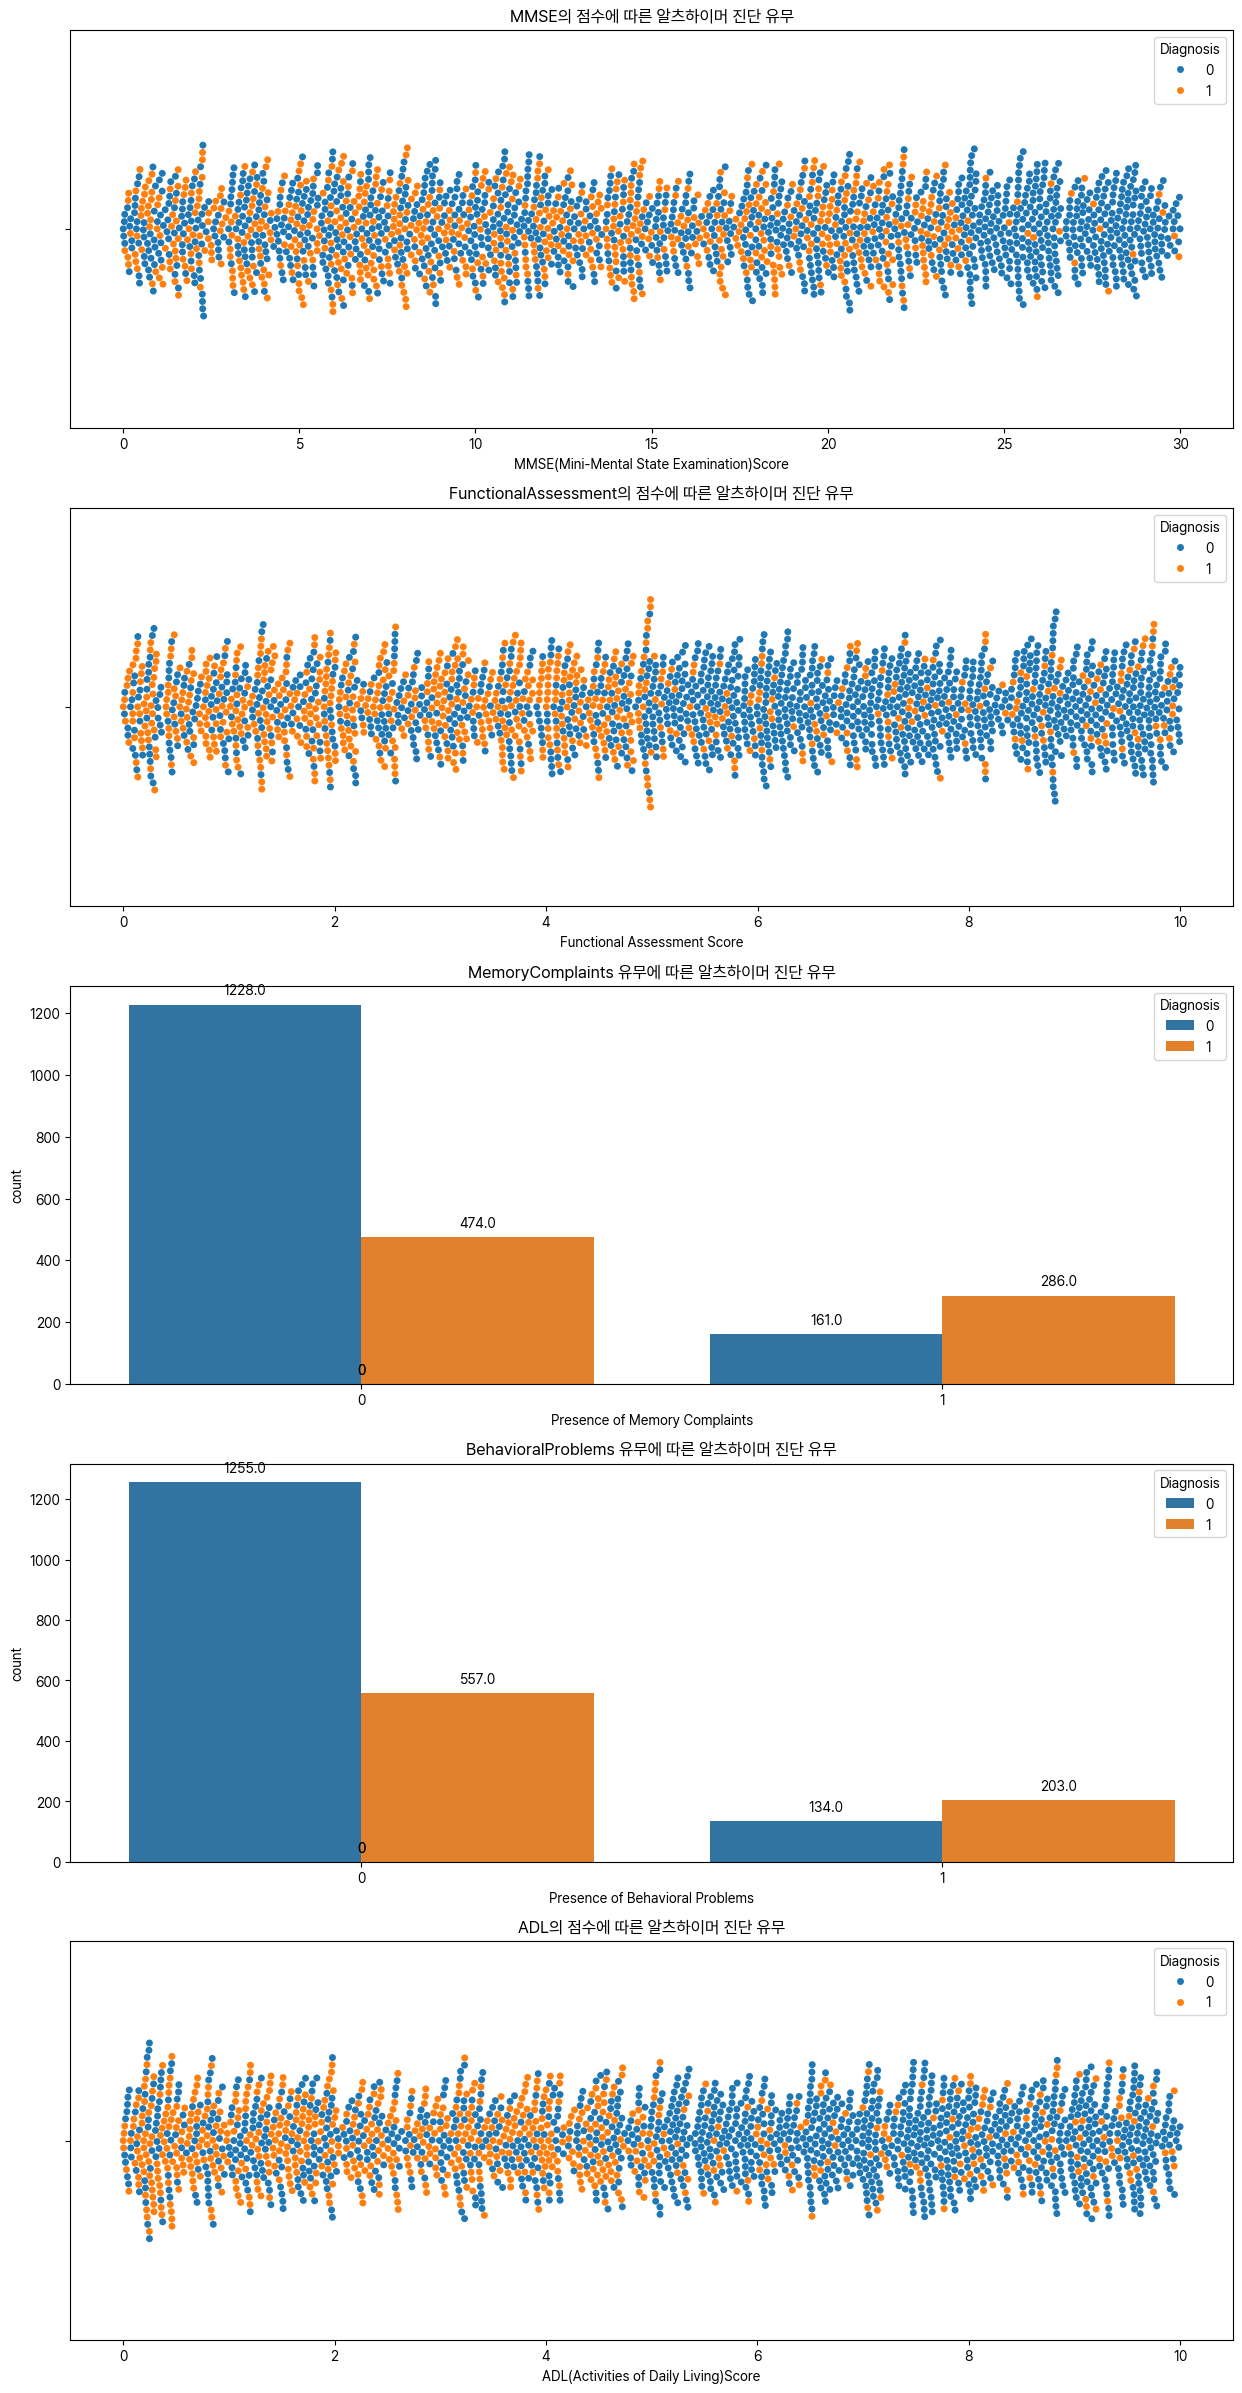

In [ ]:
# add_label이라는 함수 정의
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# subplot과 그래프 크기 설정정
fig, axes = plt.subplots(5, 1, figsize = (15, 30))

# 그래프 유형, 컬럼 이름, x-레이블, 제목으로 포함하는 튜플 리스트
plots_info = [
    (sns.swarmplot, "MMSE", "MMSE(Mini-Mental State Examination)Score", "MMSE의 점수에 따른 알츠하이머 진단 유무"),
    (sns.swarmplot, "FunctionalAssessment", "Functional Assessment Score", "FunctionalAssessment의 점수에 따른 알츠하이머 진단 유무"),
    (sns.countplot, "MemoryComplaints", "Presence of Memory Complaints", "MemoryComplaints 유무에 따른 알츠하이머 진단 유무"),
    (sns.countplot, "BehavioralProblems", "Presence of Behavioral Problems", "BehavioralProblems 유무에 따른 알츠하이머 진단 유무"),
    (sns.swarmplot, "ADL", "ADL(Activities of Daily Living)Score", "ADL의 점수에 따른 알츠하이머 진단 유무")
]

# 그래프 그리기
for ax, (plot_func, column, xlabel, title) in zip(axes, plots_info):
    plot_func(data = alz_part3, x = column, hue = "Diagnosis", ax = ax)
    if plot_func == sns.countplot:
        add_labels(ax)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

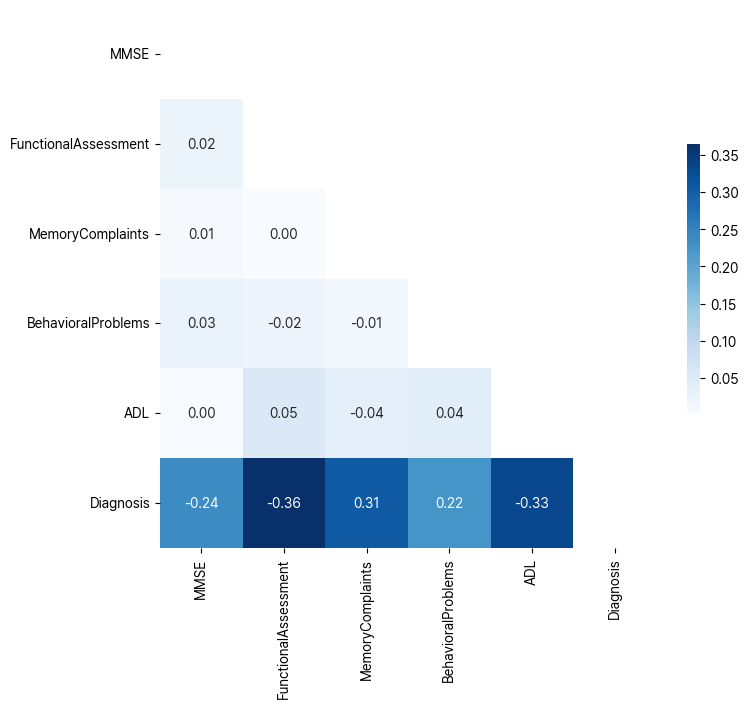

In [ ]:
# 상관관계계수 계산
correlation = alz_part3.corr(numeric_only=True)

# 히트맵 모양 대각선으로 자르기
mask = np.triu(np.ones_like(correlation, dtype=bool))
# np.ones_like() 함수로 correlation과 동일한 모양과 크기를 가지는 모든 요소가 True인 배열을 생성
# np.triu() 함수는 상삼각 행렬(Upper triangular matrix)를 생성
# 즉, 대각선 및 그 위의 요소들은 True, 그 아래의 요소들은 False로 설정됨

# 상관관계계수 대입
plt.figure(figsize=(8, 7))
cmap=sns.color_palette("Blues", as_cmap=True)
sns.heatmap(correlation.abs(),   # 상관관계가 있는지 없는지 색상으로 확인 위해 절대값 사용
            cmap=cmap, cbar_kws={"shrink": .5}, # 절대값 사용하면 색상이 진할수록 관계가 있다는 것을 의미함
            mask=mask,annot=correlation, fmt=".2f")  # 히트맵 위에 표시되는 값은 부호가 있는 상관관계계수 값

plt.show()